<center>Заметка 6. Функциональное программирование.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.15</center>

<center>Аннотация</center>
<p>
    На базе задачи построения графиков, в частности, эмитентов, вводится функциональный подход в рамках (Python версии 3.xx). Рассматриваются map filter и reduce, а также библиотека csv. Далее изучаются более продвинутые функции функционального программирования из базовых модулей itertools, functools и operator. В частности, повторы (count, ...), комбинации (product, ...), обработка (chain, starmap, dropwhile, ...) частичное вычисление (partial и attrgetter).


Ключевые слова: map, filter, reduce, lambda, matplotlib, pyplot, xlim, xticks, csv и plot. 
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h1>Отрисовка цены эмитента</h1>

<h2>Обработка данных из списка</h2>

Рассмотрим как можно обрабатывать список элементов. Замечу, что существуют три главных действия на список элементов.
* map -- выполнение определенного действия для всех элементов списка.
* reduce -- интегральное значение для списка.
* filter -- сокращение количества элементов в списке.

<b>map</b>

Возьмем список неких чисел.

In [1]:
l = [4, 25, 9, 16]

In [2]:
import math as mt

In [3]:
i = 0
for i in range(len(l)):
    l[i] = mt.sqrt(l[i])
l

[2.0, 5.0, 3.0, 4.0]

Можно короче использую языковые конструкции.

In [4]:
l = [4, 25, 9, 16]
# Применим функцию np.sqrt для всех элиментов списка l.
map( mt.sqrt, l) # Первый аргумент функция, второй -- список.

Пока результат не вывелся.

In [5]:
q = map( mt.sqrt, l)
q # Посмотрим содержимое.

In [6]:
# Проверяем тип.
type( q ) # Map есть map.

map

Map это объект ленивого действие (~генератор). Нужно чтобы числа им были сгенерированы.

In [7]:
# Для этого создадим объект список с его помощью.
list( q )

[2.0, 5.0, 3.0, 4.0]

Ну или

In [8]:
# Нужно заново, так как он уже отработал.
q = map( mt.sqrt, l)

In [9]:
for i in q:
    print(i, sep = " ", end="")

2.05.03.04.0

In [10]:
q = map( mt.sqrt, l) # Создали генератор по списку l.
l.append(81) # Добавили в список l элемент.
list(q) # Он был учтен,
# т.е. генератор актуальный список.

[2.0, 5.0, 3.0, 4.0, 9.0]

In [11]:
# Приведем другой пример.
ll = [mt.pi/2, mt.pi, mt.pi/4]
list( map( mt.sin, ll ) ) # Взяли синус от каждого элемента

[1.0, 1.2246467991473532e-16, 0.7071067811865475]

<b>Преобразование</b>

Как задать собственное преобразование.
Для простых преобразований в питоне есть лямбда функции.

Данная конструкция задается следующим образом:

 lambdaсписок аргументов/параметров : действие/значение.
* список аргементов это список, заданный через запятую, значений переменных, например: x или x, y.
* действие это выражение которое вычисляется для значений аргумента.


In [12]:
lambda x: x*2 # Умножаем число на 2.
lambda x, y: x**y # Возводим первое чило в степень второго.
# Тип имеет функции.

<function __main__.<lambda>(x, y)>

In [13]:
# Для их применения например можно сохранить в переменну.
dbl = lambda x: x*2
mypow = lambda x, y: x**y
dbl, mypow

(<function __main__.<lambda>(x)>, <function __main__.<lambda>(x, y)>)

In [14]:
type( dbl ), type( mypow )

(function, function)

In [15]:
# Применим преоьразование к числам.
dbl( 2), dbl( 2.5 ), mypow( 2, 3 )

(4, 5.0, 8)

In [16]:
l # Вспомним содержимое списка.

[4, 25, 9, 16, 81]

In [17]:
i = 0
ll = l.copy()
for i in range(len(ll)):
    ll[i] = dbl(ll[i])
ll

[8, 50, 18, 32, 162]

In [18]:
g = []
for e in l:
    g.append( dbl( e ) )
g

[8, 50, 18, 32, 162]

In [19]:
# Применим к каждому элемента списка преобразование,
q = map( dbl, l) # умножение на два.
q 

In [20]:
# Построим список по q.
list( q )

[8, 50, 18, 32, 162]

In [21]:
# Можно в явном виде.
q = map( lambda x: x*2, l) 
q 

In [22]:
list( q )

[8, 50, 18, 32, 162]

In [23]:
list( map( lambda x: x*2, l) )

[8, 50, 18, 32, 162]

In [24]:
# Можно так. Выводятся элементы.
list( map( print, l) )
# Список портится.

4
25
9
16
81


[None, None, None, None, None]

Упр. Для квадратного уравнения расписать значения в точках (например корнях).

<b>Частично заданые аргументы</b>

In [25]:
# Все аргументы нужно указывать.
list( map( mypow(,0.5), l) )
# list( map( np.power(,0.5), l) )
# Будет ошибка.

SyntaxError: invalid syntax (<ipython-input-25-482acafcca92>, line 2)

In [26]:
# Нужно так: lambda от labmda.
list( map( lambda x: mypow(x, 0.5), l) )
#list( map( lambda x: np.power(x,0.5), l) )

[2.0, 5.0, 3.0, 4.0, 9.0]

<b>filter</b>

Используется для фильтрации (как сито) элементов списка. После обработки остаются не все элементы списка.
Остаются только те для которые дают истину (для предиката).

In [27]:
# Возвращает истину тогда и только тогдв число нечетное.
odd = lambda x: x%2 == 1

In [28]:
odd(1), odd(4), odd(5.1)

(True, False, False)

In [29]:
list(map(odd, [1,4,6,5,8,9,11]))

[True, False, False, True, False, True, True]

In [30]:
ll = [1,4,6,5,8,9,11]

In [31]:
g = []
for e in ll:
    if not odd(e):
        continue
    g.append(e)
g

[1, 5, 9, 11]

In [32]:
list([e for e in ll if odd(e)])

[1, 5, 9, 11]

In [33]:
q = filter( odd, ll)
q # Тоже возвращает не сам список, а генератор.

In [34]:
# Формируем числа используя генератор.
list( q ) # От списка останется только те элементы
# на которых была истина: нечетные.
# т.е. остались нечетные эелементы.

[1, 5, 9, 11]

In [35]:
list(filter( odd, ll))

[1, 5, 9, 11]

Так нельзя

In [36]:
list(filter( not odd, ll))

TypeError: 'bool' object is not callable

In [37]:
ll

[1, 4, 6, 5, 8, 9, 11]

<b>список студентов</b>

In [38]:
stud = []

In [39]:
stud.append( ['муж', 'Максим'] )
stud.append( ['жен', 'Лена'] )
stud.append( ['жен', 'Катя'] )
stud.append( ['муж', 'Дима'] )
stud.append( ['муж', 'Саша'] )
stud.append( ['жен', 'Яна'] )

In [40]:
stud

[['муж', 'Максим'],
 ['жен', 'Лена'],
 ['жен', 'Катя'],
 ['муж', 'Дима'],
 ['муж', 'Саша'],
 ['жен', 'Яна']]

In [41]:
stud[2]

['жен', 'Катя']

In [42]:
print( 'идекс 0:', stud[2][0], 'и индекс 1:', stud[2][1] )

идекс 0: жен и индекс 1: Катя


In [43]:
# Тогда можно проверить что на нулевом индексе значение 'муж'
male = lambda x: x[0] == 'муж'

In [44]:
print(stud[2], 'мужчина? Ответ: ', male( stud[2] ) )
print(stud[3], 'мужчина? Ответ: ', male( stud[3] ) )

['жен', 'Катя'] мужчина? Ответ:  False
['муж', 'Дима'] мужчина? Ответ:  True


In [45]:
men = list( filter(male, stud) )
men

[['муж', 'Максим'], ['муж', 'Дима'], ['муж', 'Саша']]

In [46]:
men[1] # Такая же пока структура.

['муж', 'Дима']

In [47]:
list( map( lambda x: x[1], men) ) # Извлекаем имя.

['Максим', 'Дима', 'Саша']

In [48]:
list( map( lambda x: x[1], stud) ) # Извлекаем имя.

['Максим', 'Лена', 'Катя', 'Дима', 'Саша', 'Яна']

Упр. Оставить тех студентов у которых имя завершается на букву а.

От двух аргументов

In [49]:
буквы = ['a', 'b', 'c', 'd']
цифры = [1, 2, 3, 4]
симво = ['!', '@', '#', '$']
len(буквы), len(цифры), len(симво)

(4, 4, 4)

In [50]:
list(zip(буквы, цифры, симво))

[('a', 1, '!'), ('b', 2, '@'), ('c', 3, '#'), ('d', 4, '$')]

In [51]:
aa = [1, 2, -1, 3]
bb = [3, 2, 2, 3]

In [52]:
ab = zip( aa, bb)
list(ab)

[(1, 3), (2, 2), (-1, 2), (3, 3)]

In [53]:
list( map( lambda ar: pow( ar[0], ar[1]), zip( aa, bb) ) )

[1, 4, 1, 27]

<b>reduce</b>

Другим действием является редукция, т.е. сведение списка к некому значению.

In [54]:
from functools import reduce

In [55]:
mac = lambda acc, x: acc + 2*x # acc аккумулирует значение. Правило ассоциативно.

In [56]:
reduce( mac, [-1,2,3]) # (-1 + 2*(2)) + 2*(3) есть 9. Ясно что ассоциативно.

9

In [57]:
mac2 = lambda acc, x: 2*acc + x # неассоциатовно

In [58]:
reduce( mac2, [ -2, 2, 3] ) # 2*(2*(-2) + 2) + 3  есть -1.

-1

In [59]:
2*(2*(-2) + 2) + 3

-1

In [60]:
sum( [-1, 2, 3] )

4

Условно,

In [61]:
pp = [1, 2, 3, 2, 5]

In [62]:
reduce( lambda acc, x: acc*x, pp )

60

а можно было бы

In [63]:
logs = list( map( mt.log, pp) )
logs

[0.0,
 0.6931471805599453,
 1.0986122886681098,
 0.6931471805599453,
 1.6094379124341003]

In [64]:
v = mt.exp( sum(logs) )
v, round(v)

(59.999999999999986, 60)

Значения совпали

магия

<h2>Отрисовка графиков</h2>

Будем строить функцию по-точечно, т.е. построем значение в каждой из выбранных точек и соеденим соседнии прямой.
Для начала сгенерируем точки в которых будет вычислена функция.

In [65]:
x_10 = list( range(0, 10, 1) )

In [66]:
# Выполним преобразование списка чисел 0 до 9
list( map( lambda x: x/2 - 2, x_10 ) )
# Получим список чисел с шагом в 0.5 от -2 до 2.5.

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

In [67]:
# Теперь возьмем список побольше
x_30 = list( range(0, 30, 1) )
len( x_30 )

30

In [68]:
#Сгенерируем именно равномерный на набор точек.
x = list( map( lambda x: x/2 - 5, x_30 ) )
# список от -5 до 9.5 с шагом в 0.5.

In [69]:
# Пишем выражение, которое ествественно будет вычислено в каждой точке,
f = lambda x:x*x - 2*x +3 # т.е. по-элементно для списка x.
y = list( map( f, x) )

In [70]:
len(x), len(y) # Видим что длины совпадают.

(30, 30)

In [71]:
# Значение в точке -2 равно 11.
x[6], y[6] # (-2)*(-2) - 2(-2) + 3 = 4 + 4 + 3 = 11

(-2.0, 11.0)

In [72]:
type(x), type(y)

(list, list)

In [73]:
import matplotlib.pyplot as plt

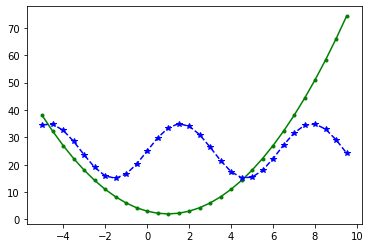

In [74]:
# Можно рисовать несколько графиков на одном чертеже:
y2 =  list( map( lambda x: 10*mt.sin( x ) + 25, x) )
# сначала тройка первого графика, потом второго.
plt.plot( x, y, 'g.-', x, y2, 'b*--');

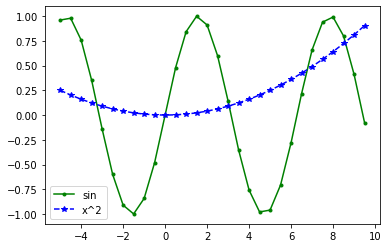

In [75]:
# Ествественно, что значения можно считать "налету":
plt.plot( x, list( map( lambda x: mt.sin(x), x) ), 'g.-')
plt.plot( x, list( map( lambda x: x*x/100, x) ), 'b*--')
plt.legend( ['sin', 'x^2'] ); # Добавим и легенду.

Ввиду того, что количество точек по которым строилась кривая было небольшим, синусойда получилась угловатой.

(-4.0, 8.0)

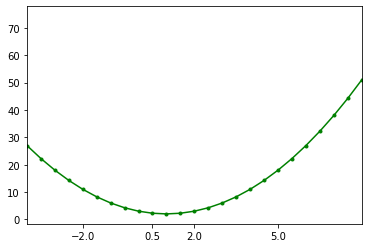

In [76]:
plt.plot( x, y, 'g.-') 
plt.xticks( [-2, 0.5, 2, 5] ) # Задаем отсчеты вдоль оси абсцисс.
plt.xlim(-4, 8) # Зданаем границы дипазона для оси абсцисс.

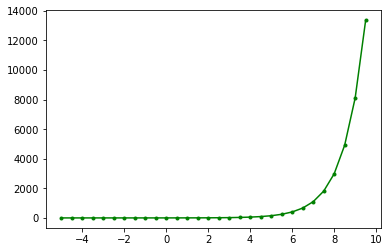

In [77]:
plt.plot( x, list( map( lambda x: mt.exp(x), x) ), 'g.-')

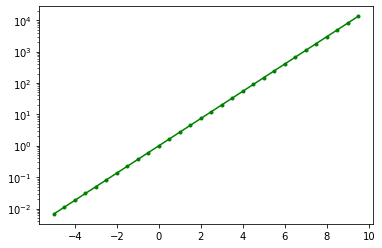

In [78]:
plt.plot( x, list( map( lambda x: mt.exp(x), x) ), 'g.-')
plt.yscale( 'log' ) # Меняем шкалу на логарифмическую.

<h2>Считать файл csv</h2>

Берем откуда-то простой csv (comma seperated values) файл. Отмечу, что расширение у некго не обязано быть csv, оно может быть и txt.

Например с
https://www.finam.ru/profile/moex-akcii/mechel/export/
Параметры можно менять: сменить эмитента (например, выбрать Газпром, Сбербанк и тому подобное), период (например, выбрать день). Промежуток времени пока лучше выбрать поменьше.
Внимание, пока скачиваем файл <b>без заголовка</b> (убрать соответствующий флажок)!
Символ ; в качестве разделителя.

Для считывания данных файлов потребуется библиотека csv.

In [79]:
import csv # Для считывания csv файлов.

In [80]:
#data = []
with open('MTLR_190101_190110.txt') as f:
    data_rows = csv.reader( f )
    data = list( data_rows )

data

[['MTLR;D;20190103;000000;73.8900000;74.4700000;73.0600000;73.1200000;391375'],
 ['MTLR;D;20190104;000000;73.3100000;74.8900000;73.2100000;73.6800000;462658'],
 ['MTLR;D;20190108;000000;74.4700000;74.8900000;73.5000000;73.7400000;406304'],
 ['MTLR;D;20190109;000000;74.0200000;74.6200000;73.8200000;73.9300000;651998'],
 ['MTLR;D;20190110;000000;73.9600000;74.7800000;73.9000000;74.4000000;358269']]

In [81]:
len(data)

5

In [82]:
data[1]

['MTLR;D;20190104;000000;73.3100000;74.8900000;73.2100000;73.6800000;462658']

Видно, что строчки из файла считались целиком, как текстовые строчки (обрати внимание на одинарные кавычки).
Хотелось бы чтобы каждый столбец отделился от других столбцов.
Для этого можно указать дополнительный параметр функции обработки csv файлов.
Параметр delimiter, он указывает какой разделитель используется для отделения стобцов.

In [83]:
data = []
with open('MTLR_190101_190110.txt') as f:
    data_rows = csv.reader( f, delimiter = ';' )
    data = list( data_rows )
data

[['MTLR',
  'D',
  '20190103',
  '000000',
  '73.8900000',
  '74.4700000',
  '73.0600000',
  '73.1200000',
  '391375'],
 ['MTLR',
  'D',
  '20190104',
  '000000',
  '73.3100000',
  '74.8900000',
  '73.2100000',
  '73.6800000',
  '462658'],
 ['MTLR',
  'D',
  '20190108',
  '000000',
  '74.4700000',
  '74.8900000',
  '73.5000000',
  '73.7400000',
  '406304'],
 ['MTLR',
  'D',
  '20190109',
  '000000',
  '74.0200000',
  '74.6200000',
  '73.8200000',
  '73.9300000',
  '651998'],
 ['MTLR',
  'D',
  '20190110',
  '000000',
  '73.9600000',
  '74.7800000',
  '73.9000000',
  '74.4000000',
  '358269']]

Теперь видно, что все стобцы считались по отедльности. Но каждый элемент по прежнему является стройчкой.
Нужно для тех стобцов про кторые мы знаем наверняка выполнить явное пробразование из текста в число.

Ранее нам уже встречалось явное преобразование, когда мы преобразовывали истинность в число.

In [84]:
data[1]

['MTLR',
 'D',
 '20190104',
 '000000',
 '73.3100000',
 '74.8900000',
 '73.2100000',
 '73.6800000',
 '462658']

In [85]:
float(data[1][4])

73.31

Нам должна быть известна структура входного файла. Точнее должно быть известно назначение столбцов.
Для ранее скаченного файла она такая: TICKER, PER, DATE, TIME, OPEN, HIGH, LOW, CLOSE, VOL.
Предпоследний столбец соответствует цене закрытия.

In [86]:
# Извлечение цены закрытия
get_close = lambda x: x[-2]

In [87]:
data[2]

['MTLR',
 'D',
 '20190108',
 '000000',
 '74.4700000',
 '74.8900000',
 '73.5000000',
 '73.7400000',
 '406304']

In [88]:
get_close(data[2])
# Будет сторокой.

'73.7400000'

In [89]:
fromStr = lambda x: float(x)
fromStr( get_close(data[2]) )

73.74

In [90]:
close_str = list( map( get_close, data) )
close_str

['73.1200000', '73.6800000', '73.7400000', '73.9300000', '74.4000000']

In [91]:
close = list( map( fromStr, close_str) )
close

[73.12, 73.68, 73.74, 73.93, 74.4]

In [92]:
# В два прохода.
close_str = list( map( lambda x: x[-2], data) )
close = list( map( lambda x: float(x), close_str) )
close

[73.12, 73.68, 73.74, 73.93, 74.4]

In [93]:
# Или в один, сразу.
close = list( map( lambda x: float(x[-2]), data) )
close

[73.12, 73.68, 73.74, 73.93, 74.4]

Теперь все сработало и был считан столбец значений.

Теперь возьмем файл побольше и построим график.

In [94]:
data = []
with open( 'MTLR_180101_190110.txt' ) as f:
    data_rows = csv.reader( f, delimiter = ';' )
    data = list( data_rows )
close = list( map( lambda x: float(x[-2]), data) )
#close Не будем его выводить. Там много данных.

In [95]:
len( close ) # А именно столько.

259

In [96]:
close[10:20] # Посмотрим на кусочек данных.

[149.9, 147.0, 153.0, 154.3, 152.95, 150.0, 149.2, 145.2, 145.0, 146.05]

<h3>Графики</h3>

Text(0.5, 0, 'День начиная с 2018 г')

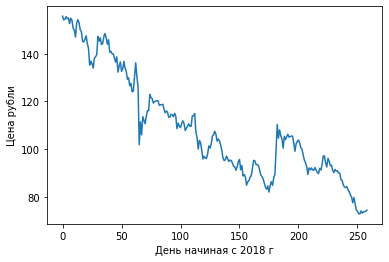

In [97]:
plt.plot( close ) # Рисуем график.
plt.ylabel( 'Цена рубли') # Название для оси y (оси ординат).
plt.xlabel( 'День начиная с 2018 г') # Название для оси x (оси абсцисс).

Упр. Нарисуй графики процентного изменения цены данного эмитента с начала периода. С легендой. 

<h1>Функциональное программирование</h1>

In [98]:
import itertools as it

<h2>Последовательности</h2>

<h3>Повторы</h3>

До бесконечности.

In [99]:
for j in it.count(5):
    print(j)
    if j > 8:
        break

5
6
7
8
9


In [100]:
ii = 0
for j in it.cycle(['Маша', 'Катя', 'Даша']):
    print(f'{j} ', end='')
    ii+=1
    if ii>=8:
        break

Маша Катя Даша Маша Катя Даша Маша Катя 

In [101]:
for j in it.repeat('учиться', 3):
    print(f'{j} ', end='')

учиться учиться учиться 

То как отвечать в некоторых опросах:

In [102]:
for j in it.repeat('Нет', 5):
    print(f'{j} ', end='')

Нет Нет Нет Нет Нет 

<h3>Комбинации</h3>

In [103]:
for el in it.product( range(3), range(2)):
    print(f'{el} ', end='')

(0, 0) (0, 1) (1, 0) (1, 1) (2, 0) (2, 1) 

In [104]:
for x in range(3):
    for y in range(2): # Подгоним печать под ту, что была
        print(f'({x}, {y}) ', end='') # в прошлой ячейке.

(0, 0) (0, 1) (1, 0) (1, 1) (2, 0) (2, 1) 

Варианты для выход на улицу

In [105]:
for el in it.product( ['рубашка', 'футболка'], ['броюки', 'шорты', 'джинсы']):
    print(f'{el} ', end='')

('рубашка', 'броюки') ('рубашка', 'шорты') ('рубашка', 'джинсы') ('футболка', 'броюки') ('футболка', 'шорты') ('футболка', 'джинсы') 

In [106]:
for perm in it.permutations( ['Даша', 'Оля', 'Маша'], 2 ):
    print(f'{perm} ', end='')

('Даша', 'Оля') ('Даша', 'Маша') ('Оля', 'Даша') ('Оля', 'Маша') ('Маша', 'Даша') ('Маша', 'Оля') 

In [107]:
for perm in it.combinations( ['Даша', 'Оля', 'Маша'], 2 ):
    print(f'{perm} ', end='')

('Даша', 'Оля') ('Даша', 'Маша') ('Оля', 'Маша') 

In [108]:
for perm in it.combinations_with_replacement( ['Даша', 'Оля', 'Маша'], 2 ):
    print(f'{perm} ', end='')

('Даша', 'Даша') ('Даша', 'Оля') ('Даша', 'Маша') ('Оля', 'Оля') ('Оля', 'Маша') ('Маша', 'Маша') 

<h3>Обработка</h3>

Аккумулирование, частичные суммы.

In [109]:
for cs in it.accumulate([3,5,7]):
    print(f'{cs} ', end='')

3 8 15 

Конкатенация последовательностей.

In [110]:
for e in it.chain([0,1,2,3],['a','b','c'],['A','B','C'],['!','@','#']):
    print(f'{e} ', end='')

0 1 2 3 a b c A B C ! @ # 

Разбиение на группы. Должны быть отсортированы

In [111]:
for k, i in it.groupby(['Aня', 'Aня', 'Aня', 'Варя', 'Варя', 'Даша', 'Даша', 'Даша', 'Даша']):
    #print(i)
    print([j for j in i])

['Aня', 'Aня', 'Aня']
['Варя', 'Варя']
['Даша', 'Даша', 'Даша', 'Даша']


In [112]:
courses = [['Маша', 'Матан'], ['Аня', 'программирование'], ['Катя', 'теория Чисел'], ['Аня', 'Линейная алгебра'], ['Маша', 'Алгебра'] ]

In [113]:
getName = lambda i: i[0]

In [114]:
getName( courses[2])

'Катя'

In [115]:
courses.sort( key = getName )
courses

[['Аня', 'программирование'],
 ['Аня', 'Линейная алгебра'],
 ['Катя', 'теория Чисел'],
 ['Маша', 'Матан'],
 ['Маша', 'Алгебра']]

In [116]:
for k, i in it.groupby( courses, key = getName):
    print( f'{k} сдала спецкурсы:' + ', '.join([j[1].lower().capitalize() for j in i]) )

Аня сдала спецкурсы:Программирование, Линейная алгебра
Катя сдала спецкурсы:Теория чисел
Маша сдала спецкурсы:Матан, Алгебра


Вызов многоаргументной функции

In [117]:
for v in it.starmap(pow, [[2, 5], [3, 2], [10, 3]]):
    print(f'{v} ', end='')

32 9 1000 

In [118]:
for v in it.starmap( lambda x, y: x+y, [[2, 5], [3, 2], [10, 3]]):
    print(f'{v} ', end='')

7 5 13 

In [119]:
l=[16, 25, 4]

In [120]:
list( it.starmap( pow, zip( l, it.repeat(0.5, len(l)) ) ) )

[4.0, 5.0, 2.0]

<b>Последовательность</b>

In [121]:
s = 'abcdefg12345678abcd'

In [122]:
for c in it.dropwhile( lambda x: x.isalpha(), s):
    print(f'{c} ', end='')

1 2 3 4 5 6 7 8 a b c d 

In [123]:
for c in it.takewhile( lambda x: x.isalpha(), s):
    print(f'{c} ', end='')

a b c d e f g 

In [124]:
for cc in it.takewhile( lambda x: x.isdigit(), it.dropwhile( lambda x: x.isalpha(), s)):
    print(f'{cc} ', end='')

1 2 3 4 5 6 7 8 

пронумеровать

In [125]:
# не запукать! list(it.zip_longest( s, it.count(0) ))
# Можно это
dat = it.zip_longest( s, it.count(0) )
dat

In [126]:
for cc in it.islice( dat, len(s)):
    print(f'[{cc[1]}] =  {cc[0]}, ', end='')

[0] =  a, [1] =  b, [2] =  c, [3] =  d, [4] =  e, [5] =  f, [6] =  g, [7] =  1, [8] =  2, [9] =  3, [10] =  4, [11] =  5, [12] =  6, [13] =  7, [14] =  8, [15] =  a, [16] =  b, [17] =  c, [18] =  d, 

оставим только числа

In [127]:
# В случае ложности предиката элемент остается.
for c in it.filterfalse( lambda x: x.isalpha(), s):
    print(f'{c} ', end='')

1 2 3 4 5 6 7 8 

Позволяет вырезать каждый n-ый

In [128]:
for n in it.compress( ['Маша', 'Аня', 'Катя', 'Даша', 'Лена'], map( lambda e: e%2, it.count(0) ) ):
    print(f'{n} ', end='')

Аня Даша 

In [129]:
len(close)

259

In [130]:
close[10:20]

[149.9, 147.0, 153.0, 154.3, 152.95, 150.0, 149.2, 145.2, 145.0, 146.05]

In [131]:
cur0 = it.islice(close, 0, 100)
cur1 = it.islice(close, 1, 101)
cur2 = it.islice(close, 2, 102)
cur3 = it.islice(close, 3, 103)

In [132]:
grp = it.zip_longest( cur0, cur1, cur2, cur3 )

Дублируем итератор.

In [133]:
itst, imin, imax = it.tee( grp, 3)

In [134]:
next(itst)

(155.75, 154.2, 154.5, 155.6)

Сдвигаются на один

In [135]:
next(itst)

(154.2, 154.5, 155.6, 154.7)

In [136]:
null = map( len, itst)
vmin = map( min, imin)
vmax = map( max, imax)
null, vmin, vmax

(<map at 0x7fc81f242ac8>, <map at 0x7fc81f242c18>, <map at 0x7fc81f242048>)

Тогда можно так

In [137]:
lens = list( null )

In [138]:
vvmin = list( vmin )
vvmax = list( vmax )

Лучше их обрабатывать в параллель.

In [139]:
vvmin[:10], vvmax[:10]

([154.2, 154.2, 154.5, 152.65, 152.65, 152.65, 150.65, 149.9, 147.0, 147.0],
 [155.75, 155.6, 155.6, 155.6, 155.0, 155.0, 154.95, 154.95, 154.0, 153.0])

Text(0.5, 0, 'День начиная с 2018 г')

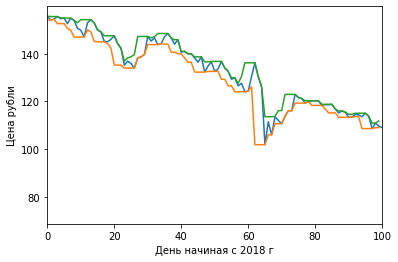

In [140]:
plt.plot( close )
plt.plot( vvmin )
plt.plot( vvmax )
plt.xlim(0, 100)
plt.ylabel( 'Цена рубли')
plt.xlabel( 'День начиная с 2018 г')

In [141]:
matrx = [[1, 2, 3], [4, 5, 6]]
matrx

[[1, 2, 3], [4, 5, 6]]

Упр. Как транспонировать матрицу (список списков)? Использовать разрешено только что пройденные методы/приемы.

In [142]:
# Хотим:
[[1, 4], [2, 5], [3, 6]]

[[1, 4], [2, 5], [3, 6]]

<h2>Частичное задание аргументов</h2>

In [143]:
import functools as ft

<h3>Функции</h3>

<b>Возведение в степень</b>

In [144]:
mt.pow(2,3)

8.0

In [145]:
ll

[1, 4, 6, 5, 8, 9, 11]

Хотим задать первый аргумент

Ранее делали так:

In [146]:
list( map( lambda x: mt.pow(2, x), ll) )

[2.0, 16.0, 64.0, 32.0, 256.0, 512.0, 2048.0]

А можно так используя встроенную функцию.

In [147]:
pow2 = ft.partial( mt.pow, 2)

In [148]:
list( map( pow2, ll ))

[2.0, 16.0, 64.0, 32.0, 256.0, 512.0, 2048.0]

А как явно задать второй?

In [149]:
qq = list( map( lambda x: ft.partial( mt.pow, x), ll ))
qq # список из функций

[functools.partial(<built-in function pow>, 1),
 functools.partial(<built-in function pow>, 4),
 functools.partial(<built-in function pow>, 6),
 functools.partial(<built-in function pow>, 5),
 functools.partial(<built-in function pow>, 8),
 functools.partial(<built-in function pow>, 9),
 functools.partial(<built-in function pow>, 11)]

In [150]:
list( map( lambda f: f(2), qq))

[1.0, 16.0, 36.0, 25.0, 64.0, 81.0, 121.0]

<b>Печать</b>

In [151]:
pnt = ft.partial( print, sep = ' ', end='')

In [152]:
pnt( 'числа:', 1, 2, '.' )
pnt( ' еще:', 3, 4, '.' )

числа: 1 2 . еще: 3 4 .

<h3>Методы</h3>

<b>Обработка списка</b>

In [153]:
isalpha = ft.partialmethod(str.isalpha)
isalpha

functools.partialmethod(<method 'isalpha' of 'str' objects>, , )

In [154]:
isalpha.func('abc'), isalpha.func('aa2')

(True, False)

In [155]:
isdigit = ft.partialmethod( str.isdigit )
isdigit

functools.partialmethod(<method 'isdigit' of 'str' objects>, , )

In [156]:
isdigit.func('123'), isdigit.func('aa2')

(True, False)

In [157]:
for cc in it.takewhile( isdigit.func, it.dropwhile( isalpha.func, s)):
    print(f'{cc} ', end='')

1 2 3 4 5 6 7 8 

<h2>Операторы</h2>

In [158]:
import operator as op

<b>Стандартные</b>

In [159]:
op.add(2, 3), op.add('a', 'b')

(5, 'ab')

In [160]:
for v in it.starmap( op.add, [[2, 5], [3, 2], [10, 3]]):
    print(f'{v} ', end='')

7 5 13 

<b>Атрибут</b>

In [161]:
z = 1+2j
z

(1+2j)

In [162]:
z.real

1.0

In [163]:
zz = [ 1+2j, 3-2j, -1+1j]

In [164]:
real = op.attrgetter('real')

In [165]:
real(z)

1.0

In [166]:
list(map( real, zz))

[1.0, 3.0, -1.0]

In [167]:
[real(o) for o in zz]

[1.0, 3.0, -1.0]

конечно можно было бы

In [168]:
[o.real for o in zz]

[1.0, 3.0, -1.0]

или

In [169]:
list(map( lambda o: o.real, zz))

[1.0, 3.0, -1.0]

Скорее полезно если поля вводится

In [170]:
ff = input("введите атрибут")

введите атрибут imag


In [171]:
fild = op.attrgetter( ff )

In [172]:
list(map( fild, zz))

[2.0, -2.0, 1.0]

In [173]:
stud[1]

['жен', 'Лена']

In [174]:
pol = op.itemgetter(0)
nam = op.itemgetter(1)

In [175]:
pol( stud[1] ), nam( stud[1] ), 

('жен', 'Лена')

In [176]:
pols = map( pol, stud)
list( filter( ft.partial( op.eq, 'муж'), pols) )

['муж', 'муж', 'муж']

In [177]:
pols = map( pol, stud)
qpols = list( map( ft.partial( op.eq, 'муж'), pols) )
qpols

[True, False, False, True, True, False]

In [178]:
list( it.compress( stud, qpols))

[['муж', 'Максим'], ['муж', 'Дима'], ['муж', 'Саша']]

In [179]:
pols = map( pol, stud)
list( it.filterfalse( ft.partial( op.eq, 'муж'), pols ) )

['жен', 'жен', 'жен']

Упр. Написать ламбда функцию которая вычисляет значение квадратичной функции по заданным коэффициентам и точке. Потом применить частичную задачу аргументов для коэффициентов.